### Choosing the Right Metric


<center>
    <img src = 'images/uci_biz.png'/>
</center>


This module introduced both the K Nearest Neighbors model as well as a variety of different metrics for classification.  It is important to select and understand the appropriate metric for your task.  This exercise is meant to get practice considering the difference between these new classification metrics and accompanying evaluation tools. Specifically, explore datasets related to business from the UCI Machine Learning Repository [here](https://archive-beta.ics.uci.edu/ml/datasets?f%5Barea%5D%5B0%5D=business&p%5Boffset%5D=0&p%5Blimit%5D=10&p%5BorderBy%5D=NumHits&p%5Border%5D=desc&p%5BStatus%5D=APPROVED).  

Select a dataset of interest and clearly state the classification task.  Specifically, describe a business problem that could be solved using the dataset and a KNN classification model.  Further, identify what you believe to be the appropriate metric and justify your choice.  Build a basic model with the `KNearestNeighbor` and grid search to optimize towards your chosen metric.  Share your results with your peers.

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import set_config
set_config("figure")
import plotly.graph_objects as go
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

X.head(10)

combine = pd.concat([y,X], axis=0)

combine.info()



<class 'pandas.core.frame.DataFrame'>
Index: 356 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    float64
 1   Alcohol                       178 non-null    float64
 2   Malicacid                     178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    float64
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  0D280_0D315_of_diluted_wines  178 non-null    float64
 13  Proline   

In [2]:
wine.data

{'ids': None,
 'features':      Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
 0      14.23       1.71  2.43               15.6        127           2.80   
 1      13.20       1.78  2.14               11.2        100           2.65   
 2      13.16       2.36  2.67               18.6        101           2.80   
 3      14.37       1.95  2.50               16.8        113           3.85   
 4      13.24       2.59  2.87               21.0        118           2.80   
 ..       ...        ...   ...                ...        ...            ...   
 173    13.71       5.65  2.45               20.5         95           1.68   
 174    13.40       3.91  2.48               23.0        102           1.80   
 175    13.27       4.28  2.26               20.0        120           1.59   
 176    13.17       2.59  2.37               20.0        120           1.65   
 177    14.13       4.10  2.74               24.5         96           2.05   
 
      Flavanoids  Nonfla

### Step 1. Split train test dataset

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=42,
                                                   stratify = y)



### Step 2. Baseline of classifier

    
Before starting the modeling process, you should have a baseline to determine whether your model is any good.  For your classifier, consider a baseline model as one in which you always guess the most frequently occurring class.  For this model baseline class has 3 states and class=2 is the highest occuring class. test data very well represnt overall data classifiers.

    overall class
    2        0.398876
    1        0.331461
    3        0.269663

    test data class
    2        0.400000
    1        0.333333
    3        0.266667

class
2        0.398876
1        0.331461
3        0.269663
Name: proportion, dtype: float64
class
2        0.400000
1        0.333333
3        0.266667
Name: proportion, dtype: float64


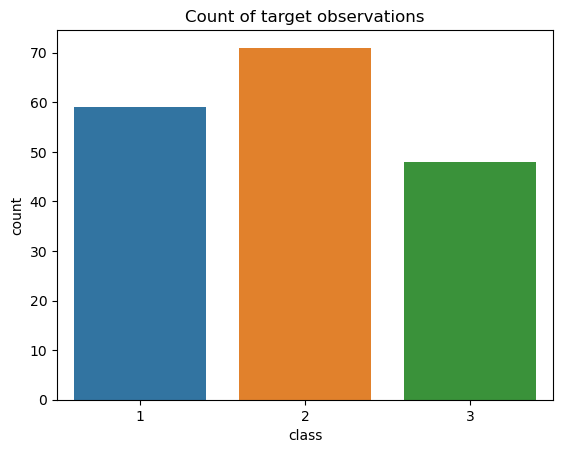

In [4]:
sns.countplot(data=y, x = 'class')
plt.title('Count of target observations')

baseline = y.value_counts(normalize = True)
print(baseline)

test_baseline = y_test.value_counts(normalize = True)
print(test_baseline)

###  Step 3 build pipeline

Accuracy of this model at K_neighbours = 5 is 0.933 and n_neighbours=50 accuracy went up to 0.95.


In [5]:
knn_pipe = Pipeline([('scaler',StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=15))])
knn_pipe.fit(X_train, y_train)
knn_pipe_acc = knn_pipe.score(X_test, y_test)
print(knn_pipe_acc)


1.0


/Users/hetalpatel/miniconda3/envs/aiml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [6]:
knn_pipe = Pipeline([('scaler',StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=50))])
knn_pipe.fit(X_train, y_train)
knn_pipe_acc = knn_pipe.score(X_test, y_test)
print(knn_pipe_acc)

0.9555555555555556


/Users/hetalpatel/miniconda3/envs/aiml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [7]:
knn_pipe = Pipeline([('scaler',StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=5))])
knn_pipe.fit(X_train, y_train)
knn_pipe_acc = knn_pipe.score(X_test, y_test)
print(knn_pipe_acc)

0.9333333333333333


/Users/hetalpatel/miniconda3/envs/aiml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Step 4 find best K using GridSearchCV

For best K = 15 we get the accuracy of 1.,0

In [8]:
params = {'knn__n_neighbors': list(range(1, 22, 2))}
knn_grid = GridSearchCV(knn_pipe, param_grid=params)
knn_grid.fit(X_train, y_train)
best_k = list(knn_grid.best_params_.values())[0]
best_acc = knn_grid.score(X_test, y_test)

print('k=',best_k)
print('accuracy',best_acc)

/Users/hetalpatel/miniconda3/envs/aiml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/hetalpatel/miniconda3/envs/aiml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/hetalpatel/miniconda3/envs/aiml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/hetalpatel/miniconda3/envs/aiml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

k= 15
accuracy 1.0


/Users/hetalpatel/miniconda3/envs/aiml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Step 5 calculate probability using predict_proba function with K=15.

Looking at probability , Class 1 and class 2 has highest probability compare to Class 3.

            class_1	    Class_2	    Class_3
        0	0.933333	0.066667	0.000000
        1	0.000000	1.000000	0.000000
        2	1.000000	0.000000	0.000000
        3	1.000000	0.000000	0.000000
        4	0.000000	1.000000	0.000000
        5	1.000000	0.000000	0.000000
        6	1.000000	0.000000	0.000000
        7	0.000000	0.733333	0.266667
        8	0.266667	0.733333	0.000000
        9	0.000000	0.266667	0.733333

In [9]:
### BEGIN SOLUTION
base_pipe = Pipeline([('scaler',StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=13))])
base_pipe.fit(X_train, y_train)
base_probs = base_pipe.predict_proba(X_test)
ypred = base_pipe.predict(X_test)
### END SOLUTION
print(base_probs)
# Answer check
probability = pd.DataFrame(base_probs[:10], columns = ['Class_1', 'Class_2','Class_3'])
probability.value_counts('Class_2')

[[0.92307692 0.07692308 0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.76923077 0.23076923]
 [0.30769231 0.69230769 0.        ]
 [0.         0.30769231 0.69230769]
 [0.07692308 0.92307692 0.        ]
 [0.07692308 0.92307692 0.        ]
 [0.         0.07692308 0.92307692]
 [0.         0.07692308 0.92307692]
 [1.         0.         0.        ]
 [0.38461538 0.61538462 0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         0.07692308 0.92307692]
 [0.         0.         1.        ]
 [0.92307692 0.07692308 0.        ]
 [1.         0.         0.        ]
 [0.         0.53846154 0.46153846]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.53846154 0.46153846 0.  

/Users/hetalpatel/miniconda3/envs/aiml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Class_2
0.000000    4
1.000000    2
0.076923    1
0.307692    1
0.692308    1
0.769231    1
Name: count, dtype: int64

### STep 5 Confusion matrix

In [10]:
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[15  0  0]
 [ 1 17  0]
 [ 0  0 12]]
Classification Report:
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777
